# Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn import datasets
import datetime as dt

In [3]:
df = pd.read_csv("Data/data.csv")
column_names = list(df.columns)

df.drop(["num", "Total"], axis=1, inplace=True)

X_num = df.iloc[:,3:10]
y_cat = df["Legendary"]

# Generate nasty df

In [3]:
data = pd.DataFrame([
    [5, "a", "1", "01/01/2019", "Ben"],
    [10, "b", "6", "01/05/2019", "Alice"],
    [6, None, "7", "15/06/2019", "Bob"],
    [None, "a", "8", None, "Carl"],
    [2, "a", "0", "31/12/2019", "Babou"]
    
], columns = ["note", "cat", "value", "date", "name"], )

data

,note,cat,value,date,name
0,5.0,a,1,01/01/2019,Ben
1,10.0,b,6,01/05/2019,Alice
2,6.0,None,7,15/06/2019,Bob
3,NaN,a,8,None,Carl
4,2.0,a,0,31/12/2019,Babou


# Handling missing values

In [54]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = "mean") #most_frequent, median
imp.fit_transform(data[["note"]])

array([[ 5.  ],
       [10.  ],
       [ 6.  ],
       [ 5.75],
       [ 2.  ]])

# Working with dates and time

In [58]:
# defining dates
date1 = dt.date.today()
date2 = dt.date(1990,3,30)

print(date2.day)
print(date2.month)
print(date2.year)
print(date2.weekday()) # Friday because 0 is Monday

30
3
1990
4


In [59]:
# maths with dates
delta = date1 - date2
print(delta)
print(delta.days)

td = dt.timedelta(days = 30)
print(date2 - td)

10884 days, 0:00:00
10884
1990-02-28


In [27]:
# sorting dates
sorted([date1, date2])

[datetime.date(1990, 3, 30), datetime.date(2020, 1, 16)]

In [51]:
# converting string to dates
# default output format is isoformat 8601 because it allows to sort date as text in chronological order
print(date2.strftime("%d/%m/%Y"))
print(date2.strftime("%d %b, %Y"))
print(date2.strftime("%A %d %B %Y"))
print(date2.strftime("Week %U, day %-j %d%b%y"))

30/03/1990
30 Mar, 1990
Friday 30 March 1990
Week 12, day 89 30Mar90


In [66]:
# working with time
dt1 = dt.datetime(1990,3,30, 16,25,55)
dt2 = dt.datetime.now()
print(dt1)
print(dt2)
print(dt2.replace(minute = 0, second = 0, microsecond = 0))

print(dt1.hour)
print(dt1.minute)
print(dt1.second)

1990-03-30 16:25:55
2020-01-16 10:36:28.028544
2020-01-16 10:00:00
16
25
55


In [68]:
# formatting datetime
print(dt1.strftime("%d/%m%Y %H:%M:%S"))

30/031990 16:25:55


In [72]:
# parse time
print(dt.datetime.strptime("15/02/20 06:00", "%d/%m/%y %H:%M"))

2020-02-15 06:00:00


In [78]:
# UNIX timestamps number of seconds since 01/01/1970
ts = 1558644517
dt.datetime.fromtimestamp(ts)

datetime.datetime(2019, 5, 23, 22, 48, 37)

In [93]:
# Time duration
duration = dt2 - dt1
print(duration)
print(duration.total_seconds())
print(duration.days)

10883 days, 18:10:33.028544
940356633.028544
10883


In [96]:
# maths with time
td = dt.timedelta(seconds = 10)
print(dt1 - td)
td = dt.timedelta(days = 5, weeks = -2, minutes = 24)
print(dt1 + td)

1990-03-30 16:25:45
1990-03-21 16:49:55


In [106]:
# UTC offset
tz1 = dt.timezone(dt.timedelta(hours = -5))
tz2 = dt.timezone(dt.timedelta(hours = +1))

dt1 = dt.datetime(1990,3,30, 16,25,55, tzinfo=tz1)
print(dt1)
print(dt1.astimezone(tz2))
print(dt1.astimezone(dt.timezone.utc))

print(dt1.replace(tzinfo=dt.timezone.utc))

1990-03-30 16:25:55-05:00
1990-03-30 22:25:55+01:00
1990-03-30 21:25:55+00:00
1990-03-30 16:25:55+00:00


In [112]:
#timezone database
from dateutil import tz

et = tz.gettz("America/New_York")
uk = tz.gettz("Europe/London")

print(dt.datetime(2020,1,17,12,0,0,tzinfo = et))

2020-01-17 12:00:00-05:00


In [138]:
# pandas

try:
    pd.read_csv("data", parse_dates = ["last_appt_dt", "wo_creation_dt"])
except:
    print("ok")
    
data["date"] = pd.to_datetime(data["date"], format="%d/%m/%Y")
data["date"].dt.weekday_name

ok


0      Tuesday
1    Wednesday
2     Saturday
3          NaN
4      Tuesday
Name: date, dtype: object

In [129]:
data.resample("Q", on="date")["note"].mean()

date
2019-03-31    5.0
2019-06-30    8.0
2019-09-30    NaN
2019-12-31    2.0
Name: note, dtype: float64

In [135]:
data["date"] = data["date"].dt.tz_localize("Europe/Paris", ambiguous = "NaT")
data["date"]

0   2019-01-01 00:00:00+01:00
1   2019-05-01 00:00:00+02:00
2   2019-06-15 00:00:00+02:00
3                         NaT
4   2019-12-31 00:00:00+01:00
Name: date, dtype: datetime64[ns, Europe/Paris]

In [139]:
data["date"].shift(1)

0                         NaT
1   2019-01-01 00:00:00+01:00
2   2019-05-01 00:00:00+02:00
3   2019-06-15 00:00:00+02:00
4                         NaT
Name: date, dtype: datetime64[ns, Europe/Paris]

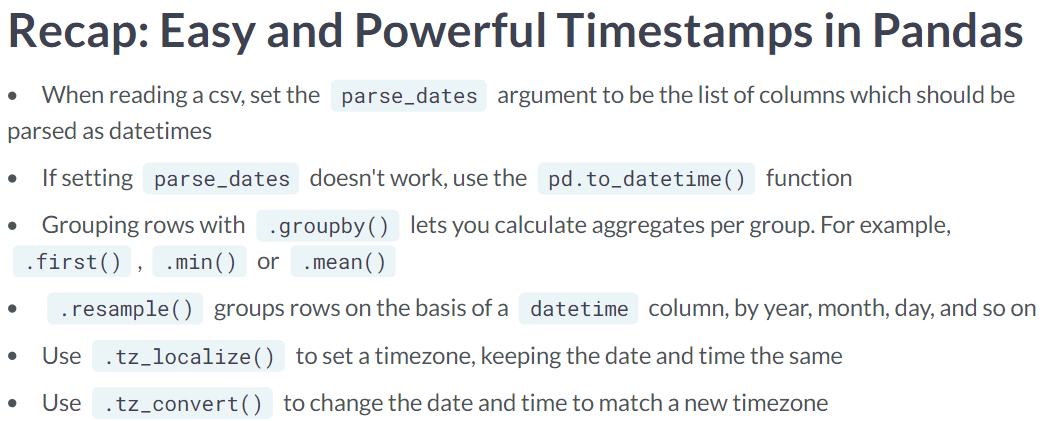
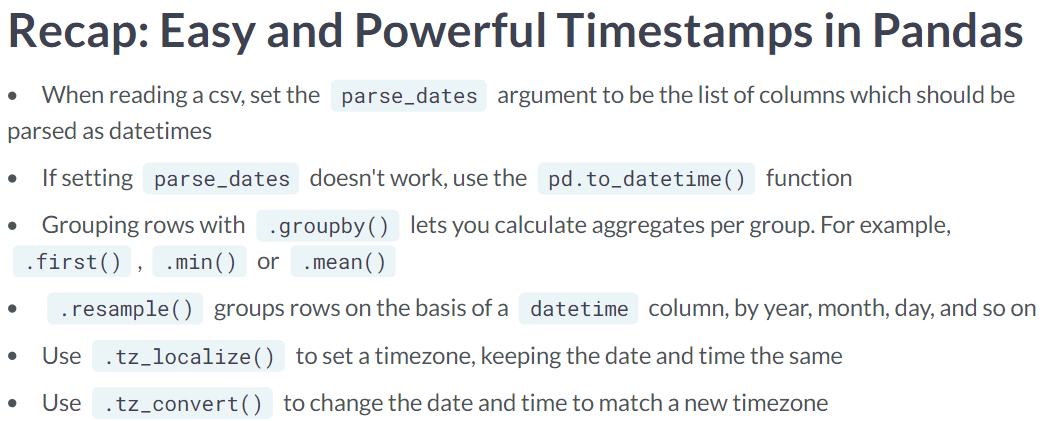
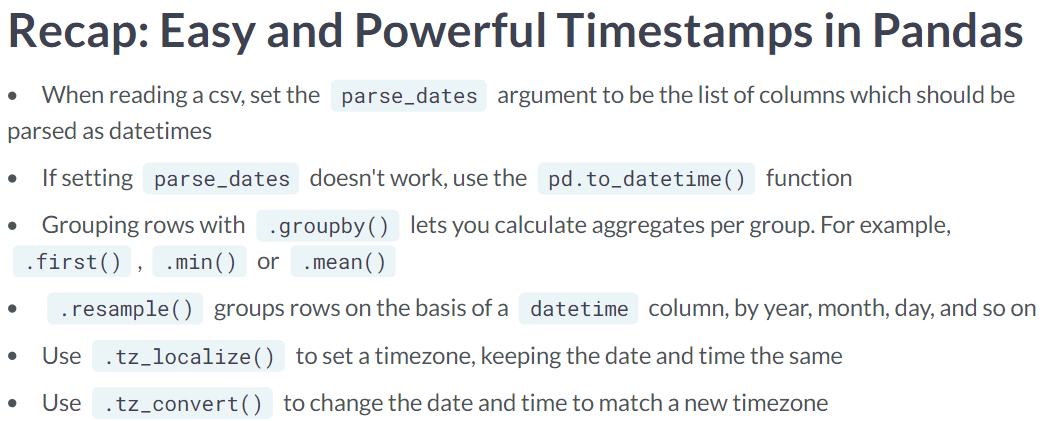
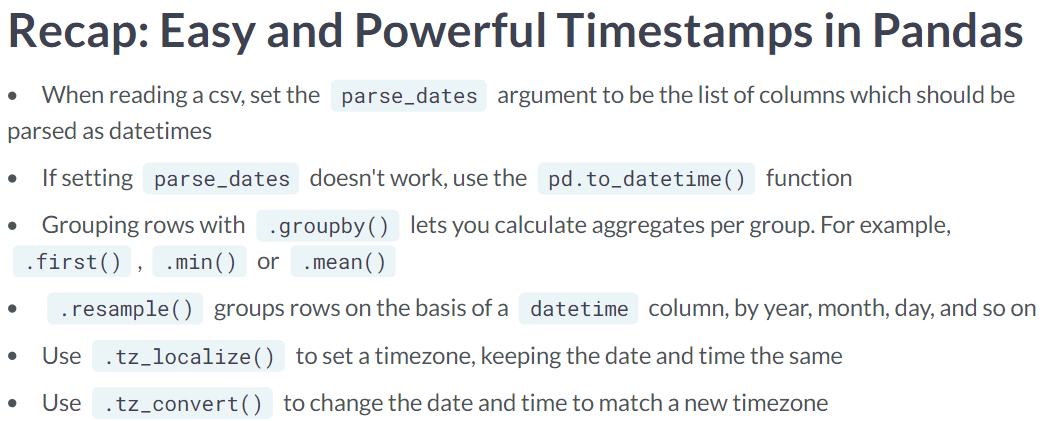

# Dimensionality reduction

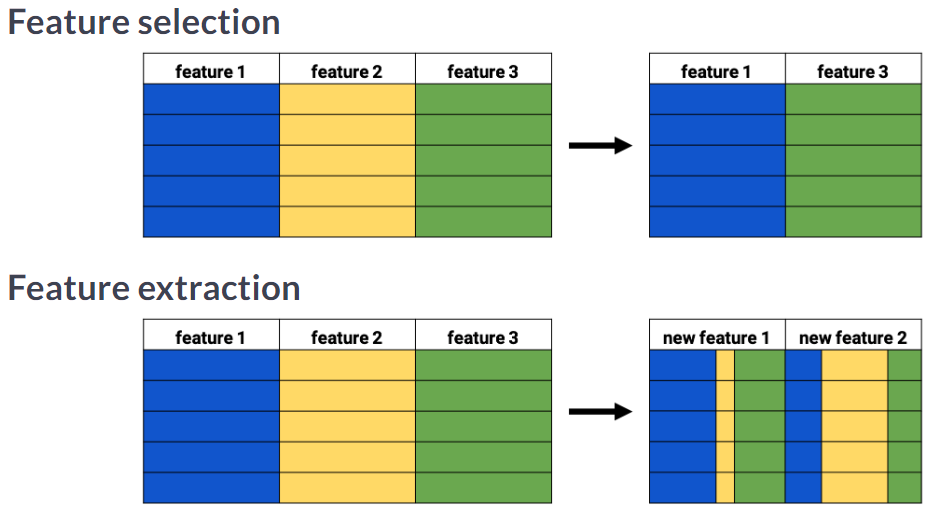

## Feature selection

### Zero variance features

In [9]:
small_variance_columns = df.describe().loc["std"][df.describe().loc["std"] < 2].index.tolist()
small_variance_columns

['Generation']

In [22]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.15)

sel.fit(X_num / X_num.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = X_num.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(X_num.shape[1], reduced_df.shape[1]))
print(reduced_df.head())

Dimensionality reduced from 7 to 5.
   Attack  Defense  Sp. Atk  Speed  Generation
0      49       49       65     45           1
1      62       63       80     60           1
2      82       83      100     80           1
3     100      123      122     80           1
4      52       43       60     65           1


### Too missing values

In [24]:
na_mask = df.isna().sum() / len(df) < 0.3

df.loc[:,na_mask].head()

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,60,62,63,80,80,60,1,False
2,Venusaur,Grass,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,80,100,123,122,120,80,1,False
4,Charmander,Fire,39,52,43,60,50,65,1,False


### Correlation

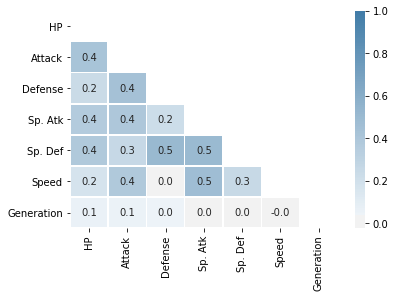

In [37]:
corr = X_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(h_neg=10,
        h_pos=240,
        as_cmap=True)

sns.heatmap(corr, 
            mask=mask,
            cmap=cmap,
            linewidths=0.5, 
            center=0, 
            annot=True, 
            fmt='.1f')

In [46]:
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=bool))
tri_df = corr.mask(mask)

to_drop = [col for col in tri_df.columns if any(tri_df[col] > 0.95)]

if to_drop != []:
    print("Columns too highly correlated: {}".format(to_drop))
    df.drop(to_drop, axis=1, inplace=True)

### LR coefficients

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_num, y_cat, test_size = 0.3)
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_std, y_train)

# use it to remove low coef features
print(dict(zip(X_num.columns, abs(lr.coef_[0]).round(2))))

y_pred = lr.predict(X_test_std)


print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 

{'Sp. Atk': 1.02, 'Defense': 0.75, 'HP': 0.59, 'Attack': 0.49, 'Speed': 0.91, 'Sp. Def': 0.65, 'Generation': 0.44}
94.6% accuracy on test set.


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [60]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

rfe.fit(X_train, y_train)

print(dict(zip(X_num.columns, rfe.ranking_)))

print(X_num.columns[rfe.support_])

acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 

Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'Sp. Atk': 1, 'Defense': 4, 'HP': 5, 'Attack': 1, 'Speed': 3, 'Sp. Def': 2, 'Generation': 1}
Index(['Attack', 'Sp. Atk', 'Generation'], dtype='object')
93.3% accuracy on test set.


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3

In [67]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step=1, verbose=1)

rfe.fit(X_train, y_train)

mask = rfe.support_

reduced_X = X_num.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Index(['Sp. Atk', 'Speed'], dtype='object')


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in ve

### Regularization

In [75]:
from sklearn.linear_model import Lasso

X_train_std = scaler.fit_transform(X_train)

la = Lasso(alpha = 0.03) # very important parameter to fine tune!

la.fit(X_train_std, y_train)

X_test_std = scaler.transform(X_test)

r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

zero_coef = la.coef_ == 0

n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict 22.3% of the variance in the test set.
The model has ignored 3 out of 7 features.


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [75]:
from sklearn.linear_model import LassoCV

X_train_std = scaler.fit_transform(X_train)

la = LassoCV()

la.fit(X_train_std, y_train)

X_test_std = scaler.transform(X_test)

r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

zero_coef = la.coef_ == 0

n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict 22.3% of the variance in the test set.
The model has ignored 3 out of 7 features.


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


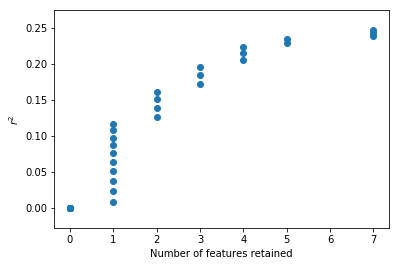

In [95]:
r_squareds = []
zero_coefs = []

for alpha in np.arange(0.2,0,-0.005):
    la = Lasso(alpha = alpha) # very important parameter to fine tune!

    la.fit(X_train_std, y_train)
    r_squareds.append(la.score(X_test_std, y_test))
    zero_coefs.append(sum(la.coef_ != 0))
    
plt.scatter(zero_coefs, r_squareds)
plt.xlabel("Number of features retained")
plt.ylabel("$r^2$");

### Tree based feature selection

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

acc = accuracy_score(y_test, rf.predict(X_test))

print(dict(zip(X_num.columns, rf.feature_importances_.round(2))))

print("{0:.1%} accuracy on test set.".format(acc))

mask = rf.feature_importances_ > 0.15

reduced_X = X_num[X_num.columns[mask]]

print(reduced_X.columns)

{'Sp. Atk': 0.17, 'Defense': 0.08, 'HP': 0.15, 'Attack': 0.18, 'Speed': 0.16, 'Sp. Def': 0.17, 'Generation': 0.08}
94.6% accuracy on test set.
Index(['HP', 'Attack', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object')


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Combining multiple selectors

In [106]:
from sklearn.linear_model import LassoCV

lcv = LassoCV()
lcv.fit(X_train, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

score = lcv.score(X_test, y_test)
print('The Lasso model explains {0:.1%} of the test set variance'.format(r_squared))

lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier

rfe_gb = RFE(estimator=GradientBoostingClassifier(), 
             n_features_to_select=3, step=1, verbose=1)
rfe_gb.fit(X_train, y_train)

score = rfe_gb.score(X_test, y_test)
print('The GBM model can explain {0:.1%} of the variance in the test set'.format(score))

gb_mask = rfe_gb.support_

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe_rf = RFE(estimator=RandomForestClassifier(), 
             n_features_to_select=3, step=1, verbose=1)
rfe_rf.fit(X_train, y_train)

score = rfe_rf.score(X_test, y_test)
print('The RFC model can explain {0:.1%} of the variance in the test set'.format(score))

rf_mask = rfe_rf.support_

votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)
meta_mask = votes >= 2

X_reduced = X_num.loc[:, meta_mask]

from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_cat, test_size=0.3, random_state=0)
lm = LogisticRegression()
lm.fit(scaler.fit_transform(X_train), y_train)
score = lm.score(scaler.transform(X_test), y_test)
print('The model can explain {0:.1%} of the variance in the test set using {1:} features.'.format(score, len(lm.coef_[0])))

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Optimal alpha = 0.259
The Lasso model explains 92.9% of the test set variance
5 features out of 5 selected
Fitting estimator with 5 features.
Fitting estimator with 4 features.
The GBM model can explain 91.2% of the variance in the test set
Fitting estimator with 5 features.
Fitting estimator with 4 features.
The RFC model can explain 94.2% of the variance in the test set
The model can explain 93.3% of the variance in the test set using 4 features.


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return 

7

## Feature extraction

Basic way to create new features :
* average/sum columns
* 

### PCA

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


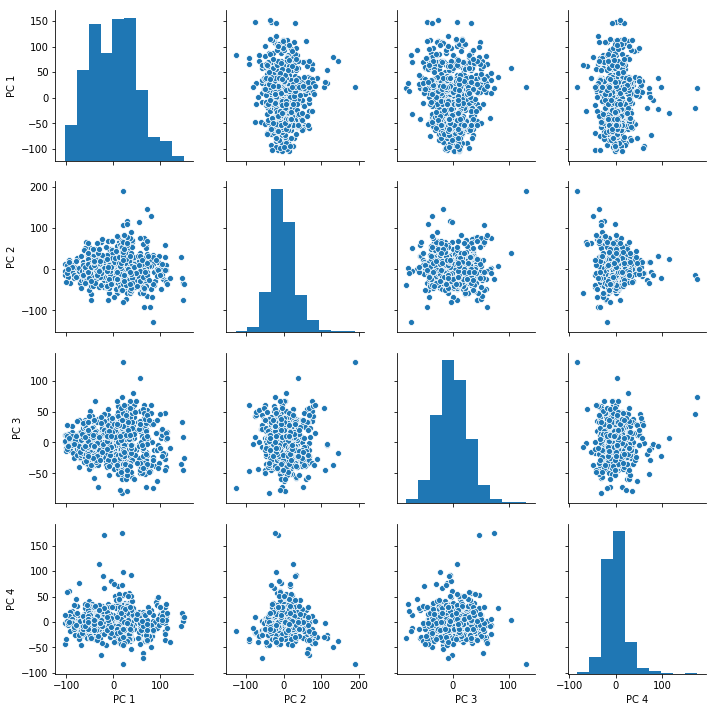

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Better performance if data is scaled first
scaler = StandardScaler()
X_num_std = scaler.fit_transform(X_num)

pca = PCA(n_components=4)
pc = pca.fit_transform(X_num)
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)
plt.show()

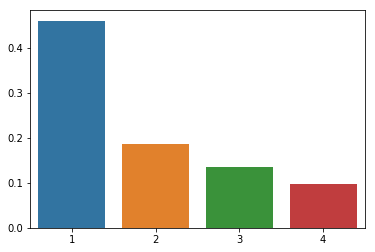

In [19]:
sns.barplot(x = 1+np.arange(len(pca.explained_variance_ratio_)), y=pca.explained_variance_ratio_)

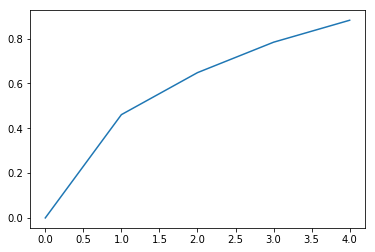

In [25]:
sns.lineplot(np.arange(len(pca.explained_variance_ratio_)+1), [0] + pca.explained_variance_ratio_.cumsum().tolist())

In [26]:
pca.components_

array([[ 3.00808555e-01,  4.92891796e-01,  3.80634928e-01,
         5.08979567e-01,  3.94369122e-01,  3.27259783e-01,
         1.66494205e-03],
       [ 4.22137554e-02,  7.65451476e-02,  6.95209383e-01,
        -3.83311911e-01,  1.73888729e-01, -5.76084748e-01,
         1.95057642e-03],
       [-5.89866712e-02, -7.30430423e-01,  4.15099593e-02,
         3.84783244e-01,  5.40789264e-01, -1.44074085e-01,
        -6.15214991e-04],
       [ 8.01572932e-01,  2.73572911e-02, -3.66021707e-01,
         1.01019390e-01, -4.17150069e-02, -4.59131730e-01,
         3.67671372e-03]])

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

pipe.fit(X_num)
vectors = pipe.steps[1][1].components_.round(2)

print('PC 1 effects = ' + str(dict(zip(X_num.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(X_num.columns, vectors[1]))))

PC 1 effects = {'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.33, 'Generation': 0.05, 'Defense': 0.36, 'Attack': 0.44, 'HP': 0.39}
PC 2 effects = {'Sp. Atk': -0.29, 'Sp. Def': 0.2, 'Speed': -0.64, 'Generation': 0.36, 'Defense': 0.57, 'Attack': -0.0, 'HP': 0.1}


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


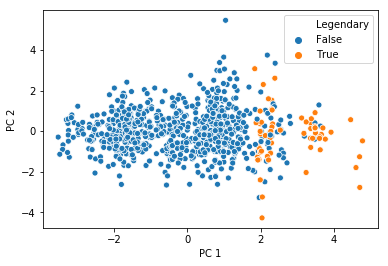

In [44]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=4))])

pc = pipe.fit_transform(X_num)

df['PC 1'] = pc[:, 0]
df['PC 2'] = pc[:, 1]

# Use the Legendary feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=df, 
                x='PC 1', y='PC 2', hue="Legendary")
plt.show()

In [45]:
# will only be equal to the original df if you kept all the components
pipe.inverse_transform(pc)

array([[ 44.45886676,  44.31145424,  58.35850045, ...,  62.94540367,
         56.68520432,   1.07092713],
       [ 56.16309467,  61.27818951,  71.38151997, ...,  77.70333327,
         68.94799721,   1.0691739 ],
       [ 72.87193675,  85.58040744,  89.78122769, ...,  97.44017259,
         85.2130572 ,   1.06142202],
       ...,
       [ 81.65395337,  90.40737516,  91.18727183, ..., 117.3774273 ,
        102.16274984,   6.17656563],
       [ 99.58327372, 120.19461688,  93.74990132, ..., 116.37675195,
        119.67132451,   6.14045483],
       [ 91.82949747, 105.081523  , 108.31715466, ..., 107.14643567,
         77.90809613,   6.00551675]])

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_num, y_cat, test_size = 0.3)

pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=0.75)),
        ('classifier', RandomForestClassifier(random_state=0))])

pipe.fit(X_train, y_train)

print(pipe.steps[1][1].explained_variance_ratio_)

[0.3876957  0.16241582 0.13874929 0.11077958]


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## visualization

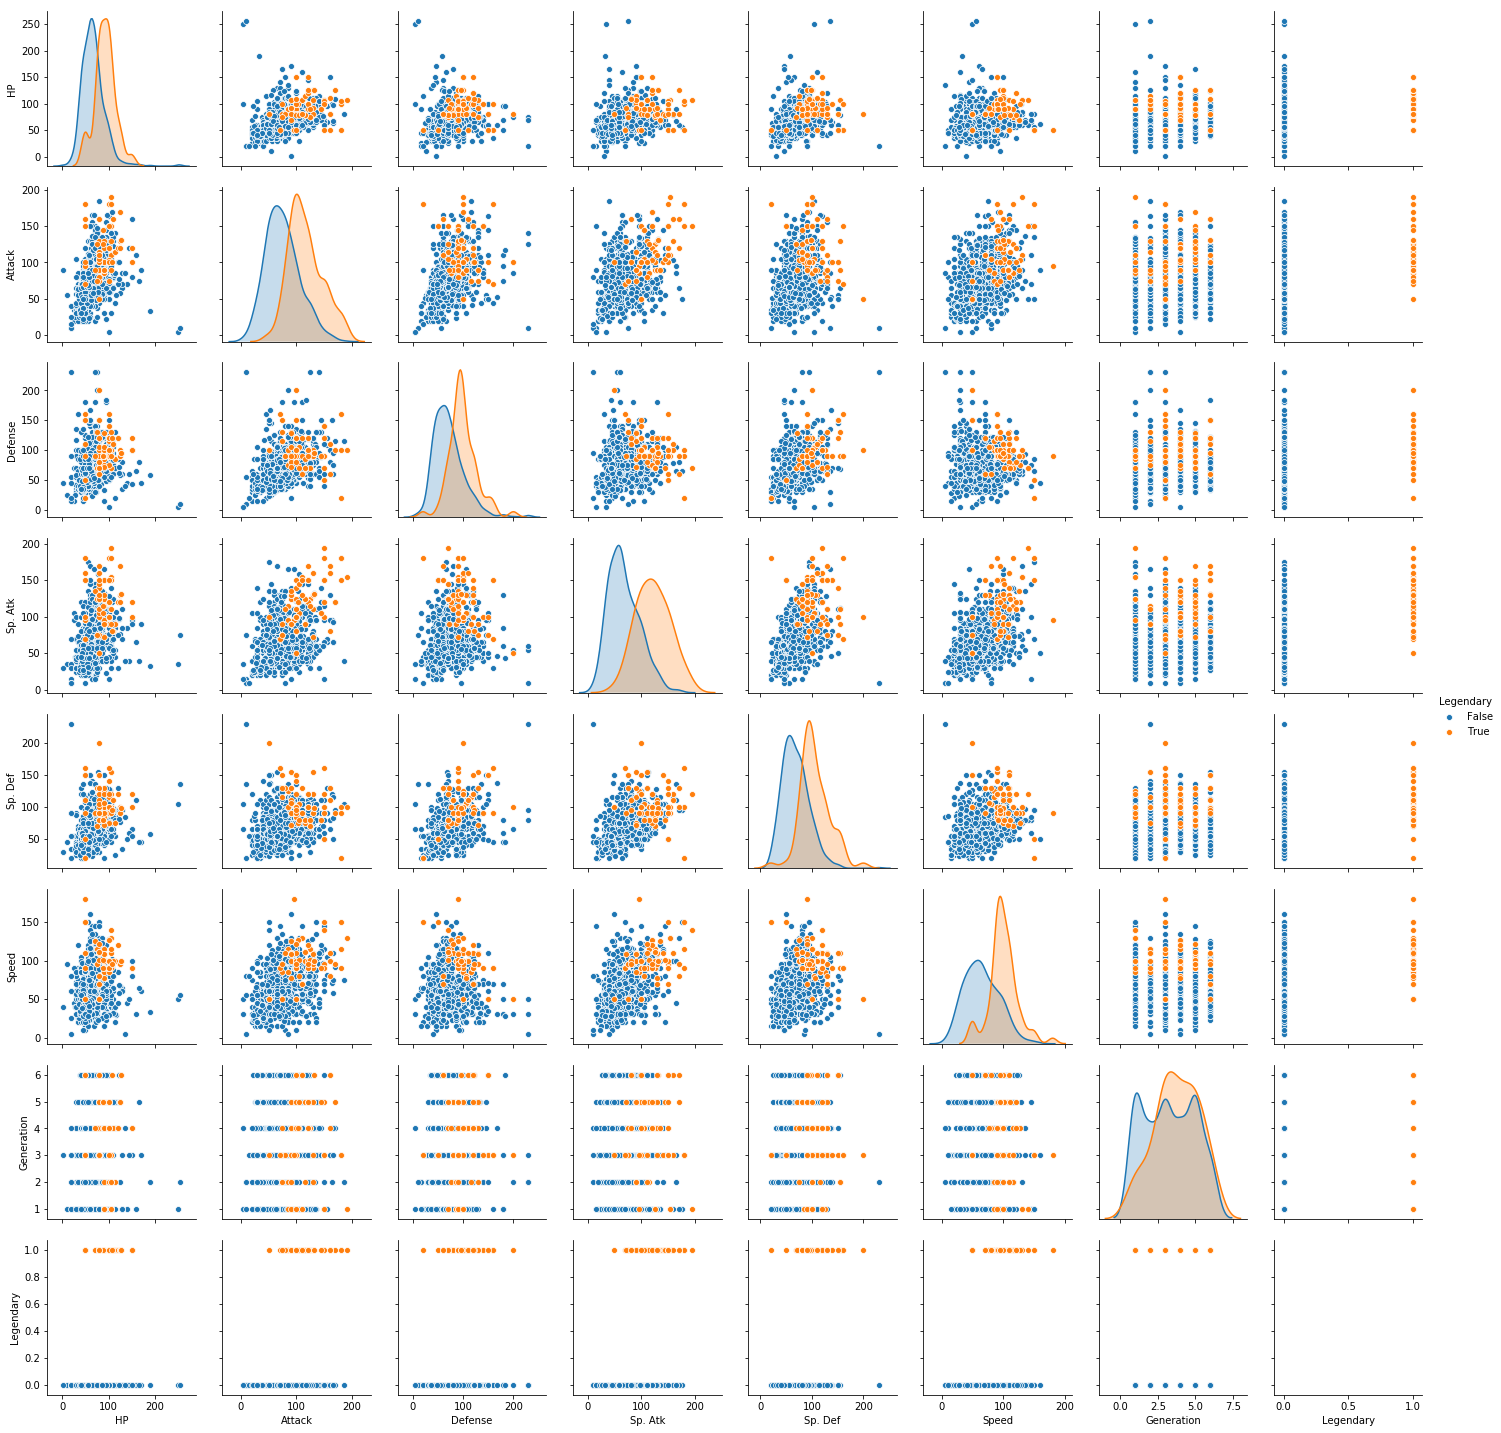

In [23]:
sns.pairplot(df, hue="Legendary")

### t-SNE

In [31]:
from sklearn.manifold import TSNE

non_numeric = ['Name', 'Type 1', 'Type 2']

df_numeric = df.drop(non_numeric, axis=1)

m = TSNE(learning_rate = 100)

tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

df["tsne1"] = tsne_features[:,0]
df["tsne2"] = tsne_features[:,1]

(800, 2)


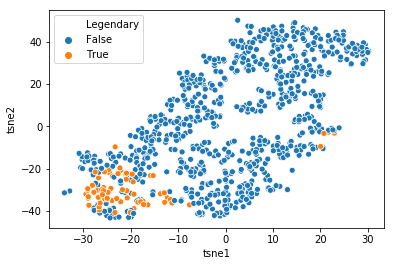

In [32]:
sns.scatterplot(x="tsne1", y="tsne2", hue="Legendary", data=df)

# Show the plot
plt.show()

# Pandas

## Basics

In [7]:
df.loc[:2, "HP":"Speed"] # slices only works with .loc / note that slices are inclusive in pandas contrary to numpy

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80


In [10]:
dic = {"a":[1,2], "b":[2,4]}
df = pd.DataFrame(data=dic)
df.head()

,a,b
0,1,2
1,2,4


In [10]:
import pandas as pd
dic = {"a":[1,2], "b":[2,4]}
df = pd.DataFrame(data=dic)
df.head()

,a,b
0,1,2
1,2,4


In [5]:
df.max(axis=1)

0    2
1    4
dtype: int64

In [6]:
# to replace categories that have small number of occurences, so that you can apply dummy encoding afterwards

counts = df["Type 1"].value_counts()

mask = df["Type 1"].isin(counts[counts < 20].index)

df["Type 1"][mask] = "other"

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [79]:
generator = df.iterrows()
next(generator)
next(generator)

(1, Name          Ivysaur
 Type 1          Grass
 Type 2         Poison
 HP                 60
 Attack             62
 Defense            63
 Sp. Atk            80
 Sp. Def            80
 Speed              60
 Generation          1
 Legendary       False
 Name: 1, dtype: object)

In [90]:
df.HP.apply(lambda x: np.sqrt(x)).head()

0    6.708204
1    7.745967
2    8.944272
3    8.944272
4    6.244998
Name: HP, dtype: float64

In [104]:
df[["Attack", "Defense"]].apply(lambda x: sum(x), axis=1).head()

0     98
1    125
2    165
3    223
4     95
dtype: int64

### Cleaning data

In [39]:
df.isna().any()

Name         False
Type 1       False
Type 2        True
HP           False
Attack       False
Defense      False
Sp. Atk      False
Sp. Def      False
Speed        False
Legendary    False
dtype: bool

In [43]:
df["type"] = df["Type 1"].str.cat(df["Type 2"], sep = "-")
df.type.head()

Generation
6    Fire-Water
6           NaN
6           NaN
6           NaN
6           NaN
Name: type, dtype: object

In [12]:
df = pd.melt(df, id_vars=["country","year"], value_name="cases", var_name="sex_and_age")
# Extract Sex, Age lower bound and Age upper bound group
tmp_df = df["sex_and_age"].str.extract("(\D)(\d+)(\d{2})")    

# Name columns
tmp_df.columns = ["sex", "age_lower", "age_upper"]

# Create `age`column based on `age_lower` and `age_upper`
tmp_df["age"] = tmp_df["age_lower"] + "-" + tmp_df["age_upper"]

# Merge 
df = pd.concat([df, tmp_df], axis=1)

# Drop unnecessary columns and rows
df = df.drop(['sex_and_age',"age_lower","age_upper"], axis=1)
df = df.dropna()
df = df.sort(ascending=True,columns=["country", "year", "sex", "age"])
df.head(10)

NameError: name 'df' is not defined

In [14]:
df.drop_duplicates(subset = ["Generation", "Legendary"])

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
156,Articuno,Ice,Flying,90,85,100,95,125,85,1,True
166,Chikorita,Grass,NaN,45,49,65,49,65,45,2,False
262,Raikou,Electric,NaN,90,85,75,115,100,115,2,True
272,Treecko,Grass,NaN,40,45,35,65,55,70,3,False
414,Regirock,Rock,NaN,80,100,200,50,100,50,3,True
432,Turtwig,Grass,NaN,55,68,64,45,55,31,4,False
537,Uxie,Psychic,NaN,75,75,130,75,130,95,4,True
553,Victini,Psychic,Fire,100,100,100,100,100,100,5,True
554,Snivy,Grass,NaN,45,45,55,45,55,63,5,False


In [38]:
df.reset_index(inplace=True)
df.set_index("Generation", inplace=True)
df.sort_index(ascending=False, inplace=True)
df.loc[[1, 2]].head() #easier than subsetting

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Generation,,,,,,,,,,
1,Psyduck,Water,NaN,50,52,48,65,50,55,False
1,Venonat,Bug,Poison,60,55,50,40,55,45,False
1,Golduck,Water,NaN,80,82,78,95,80,85,False
1,Persian,Normal,NaN,65,70,60,65,65,115,False
1,Meowth,Normal,NaN,40,45,35,40,40,90,False


### Exploring

In [17]:
df["Type 1"].value_counts(sort=True, normalize=True)

Water       0.14000
Normal      0.12250
Grass       0.08750
Bug         0.08625
Psychic     0.07125
Fire        0.06500
Rock        0.05500
Electric    0.05500
Dragon      0.04000
Ground      0.04000
Ghost       0.04000
Dark        0.03875
Poison      0.03500
Steel       0.03375
Fighting    0.03375
Ice         0.03000
Fairy       0.02125
Flying      0.00500
Name: Type 1, dtype: float64

In [20]:
df.groupby("Generation")["Attack"].agg([min, np.mean, max])

,min,mean,max
Generation,,,
1,5,76.638554,190
2,10,72.028302,185
3,15,81.625000,180
4,5,82.867769,170
5,25,82.066667,170
6,22,75.804878,160


In [25]:
df.pivot_table(values = "Attack",
              index = "Generation",
              columns = "Legendary",
              aggfunc = [np.min, np.mean, np.max ],
              fill_value = 0, #fill NA's
              margins = True)

amin                mean                         amax          
Legendary  False True All      False        True        All False True  All
Generation                                                                 
1              5   85   5  74.981250  120.833333  76.638554   155  190  190
2             10   75  10  70.693069   99.000000  72.028302   185  130  185
3             15   50  15  76.971831  118.333333  81.625000   165  180  180
4              5   75   5  79.620370  109.846154  82.867769   170  160  170
5             25   90  25  78.246667  120.266667  82.066667   147  170  170
6             22  100  22  70.459459  125.250000  75.804878   150  160  160
All            5   50   5  75.669388  116.676923  79.001250   185  190  190

## dplyr equivalent

In [6]:
df.sort_values("HP", ascending=False).head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,Blissey,Normal,NaN,255,10,10,75,135,55,2,False
121,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
217,Wobbuffet,Psychic,NaN,190,33,58,33,58,33,2,False
351,Wailord,Water,NaN,170,90,45,90,45,60,3,False
655,Alomomola,Water,NaN,165,75,80,40,45,65,5,False


In [7]:
df.sort_values(["HP", "Attack"], ascending=[False, True]).head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,Blissey,Normal,NaN,255,10,10,75,135,55,2,False
121,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
217,Wobbuffet,Psychic,NaN,190,33,58,33,58,33,2,False
351,Wailord,Water,NaN,170,90,45,90,45,60,3,False
655,Alomomola,Water,NaN,165,75,80,40,45,65,5,False


In [10]:
df[df["Type 1"].isin(["Fire", "Dragon"])].head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False


In [6]:
df["Type 1"].str.lower().head()

0    grass
1    grass
2    grass
3    grass
4     fire
Name: Type 1, dtype: object

In [69]:
df["Type 1"].replace("Grass", "Plant").head()

0    Plant
1    Plant
2    Plant
3    Plant
4     Fire
Name: Type 1, dtype: object

In [70]:
df["Type 1"].replace(["Grass", "Fire", "Water"], "Elemental").head()

0    Elemental
1    Elemental
2    Elemental
3    Elemental
4    Elemental
Name: Type 1, dtype: object

In [71]:
# replace with lists
df["Type 1"].replace(["Grass", "Fire"], ["Plant", "Burn"]).head()

0    Plant
1    Plant
2    Plant
3    Plant
4     Burn
Name: Type 1, dtype: object

In [74]:
# replace with dicts
df["Type 1"].replace({"Grass":"Plant", "Fire":"Burn"}).head()

0    Plant
1    Plant
2    Plant
3    Plant
4     Burn
Name: Type 1, dtype: object

In [75]:
# replace with dicts
df.replace({"Type 1": {"Grass":"Plant", "Fire":"Burn"}}).head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Plant,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Plant,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Plant,Poison,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Plant,Poison,80,100,123,122,120,80,1,False
4,Charmander,Burn,NaN,39,52,43,60,50,65,1,False


In [11]:
df.rename({"Type 1":"Type1", "Type 2":"Type2"}, axis=1, inplace=True)

In [14]:
df.Type1.astype(str);

In [26]:
df.query("Type1 == 'Fire' and HP > 80 and Legendary == False")

,Name,Type1,Type2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
64,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False
558,Pignite,Fire,Fighting,90,93,55,70,55,55,5,False
559,Emboar,Fire,Fighting,110,123,65,100,65,65,5,False
615,DarmanitanStandard Mode,Fire,NaN,105,140,55,30,55,95,5,False
616,DarmanitanZen Mode,Fire,Psychic,105,30,105,140,105,55,5,False
692,Heatmor,Fire,NaN,85,97,66,105,66,65,5,False
736,Pyroar,Fire,Normal,86,68,72,109,66,106,6,False


In [33]:
df.groupby("Generation").HP.mean()

Generation
1    65.819277
2    71.207547
3    66.543750
4    73.082645
5    71.787879
6    68.268293
Name: HP, dtype: float64

In [44]:
df.fillna({"Type2":" "}, inplace=True)
df["Type"] = df["Type1"] + "-" + df["Type2"]
df.drop(["Type1","Type2"], axis=1, inplace=True)

In [46]:
df.head()

,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
0,Bulbasaur,45,49,49,65,65,45,1,False,Grass-Poison
1,Ivysaur,60,62,63,80,80,60,1,False,Grass-Poison
2,Venusaur,80,82,83,100,100,80,1,False,Grass-Poison
3,VenusaurMega Venusaur,80,100,123,122,120,80,1,False,Grass-Poison
4,Charmander,39,52,43,60,50,65,1,False,Fire-


In [127]:
df.sort_values("Sp. Atk", ascending=False).groupby("Generation").head(2).sort_values("Generation")

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
164,MewtwoMega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True
71,AlakazamMega Alakazam,Psychic,NaN,55,50,65,175,95,150,1,False
196,AmpharosMega Ampharos,Electric,Dragon,90,95,105,165,110,45,2,False
248,HoundoomMega Houndoom,Dark,Fire,75,90,90,140,90,115,2,False
422,KyogrePrimal Kyogre,Water,NaN,100,150,90,180,160,90,3,True
429,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,3,True
540,Dialga,Steel,Dragon,100,120,120,150,100,90,4,True
541,Palkia,Water,Dragon,90,120,100,150,120,100,4,True
712,KyuremWhite Kyurem,Dragon,Ice,125,120,90,170,100,95,5,True
706,Reshiram,Dragon,Fire,100,120,100,150,120,90,5,True


In [125]:
zscore = lambda x: (x-x.mean()) / (x.std())

df.groupby("Generation").transform(zscore).head(3)

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,-0.739479,-0.898969,-0.763283,-0.198010,-0.160373,-0.929521,-0.193065
1,-0.206695,-0.476132,-0.274479,0.237542,0.427740,-0.424060,-0.193065
2,0.503685,0.174386,0.423812,0.818277,1.211892,0.249889,-0.193065


In [129]:
# fill missing values by using group median
missing_transformation = lambda x: x.fillna(x.median())
df.groupby("Legendary").transform(missing_transformation);

In [141]:
filter_nul = lambda x: x["Attack"].mean() > 82
df.groupby("Generation").filter(filter_nul)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
432,Turtwig,Grass,NaN,55,68,64,45,55,31,4,False
433,Grotle,Grass,NaN,75,89,85,55,65,36,4,False
434,Torterra,Grass,Ground,95,109,105,75,85,56,4,False
435,Chimchar,Fire,NaN,44,58,44,58,44,61,4,False
436,Monferno,Fire,Fighting,64,78,52,78,52,81,4,False
437,Infernape,Fire,Fighting,76,104,71,104,71,108,4,False
438,Piplup,Water,NaN,53,51,53,61,56,40,4,False
439,Prinplup,Water,NaN,64,66,68,81,76,50,4,False
440,Empoleon,Water,Steel,84,86,88,111,101,60,4,False
441,Starly,Normal,Flying,40,55,30,30,30,60,4,False


## Sampling

In [53]:
df.sample(3, axis=0)

,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
179,Ledyba,40,20,30,40,80,55,2,False,Bug-Flying
234,Teddiursa,60,80,50,50,50,40,2,False,Normal-
227,Qwilfish,65,95,75,55,55,85,2,False,Water-Poison


In [55]:
df.sample(5, axis=1).head(2)

,Name,Defense,Sp. Atk,Generation,Type
0,Bulbasaur,49,65,1,Grass-Poison
1,Ivysaur,63,80,1,Grass-Poison


# Pandas-profiling

In [3]:
import pandas_profiling as pp

In [5]:
profile = pp.ProfileReport(df)
profile.to_file(outputfile = "./test.html")

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyte

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyte

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyte

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyte

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyte

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyte

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyte

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyte

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyte

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyte

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyte

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyte

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyte

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/work/jupyte

# scipy

In [12]:
from scipy.stats.mstats import winsorize

print(df["HP"].describe())
winsorize(df["HP"], limits = [0.02,0.02])

count    800.000000
mean      69.258750
std       25.534669
min        1.000000
25%       50.000000
50%       65.000000
75%       80.000000
max      255.000000
Name: HP, dtype: float64


masked_array(data=[ 45,  60,  80,  80,  39,  58,  78,  78,  78,  44,  59,
                    79,  79,  45,  50,  60,  40,  45,  65,  65,  40,  63,
                    83,  83,  30,  55,  40,  65,  35,  60,  35,  60,  50,
                    75,  55,  70,  90,  46,  61,  81,  70,  95,  38,  73,
                   115, 126,  40,  75,  45,  60,  75,  35,  60,  60,  70,
                    30,  35,  40,  65,  50,  80,  40,  65,  55,  90,  40,
                    65,  90,  30,  40,  55,  55,  70,  80,  90,  50,  65,
                    80,  40,  80,  40,  55,  80,  50,  65,  90,  95,  95,
                    30,  50,  52,  35,  60,  65,  90,  80, 105,  30,  50,
                    30,  45,  60,  60,  35,  60,  85,  30,  55,  40,  60,
                    60,  95,  50,  60,  50,  50,  90,  40,  65,  80, 105,
                   126,  65, 105, 105,  30,  55,  45,  80,  30,  60,  40,
                    70,  65,  65,  65,  65,  65,  75,  30,  95,  95, 126,
                    48,  55, 126,  65,

# Statsmodel

In [16]:
from statsmodels.formula.api import ols

model = ols(formula = "Defense ~ Attack", data=df).fit()

In [18]:
from statsmodels.formula.api import glm
import statsmodels.api as sm

model = glm(formula = "Defense ~ Attack", data=df,
           family = sm.families.Gaussian()).fit()

model

# Missingno

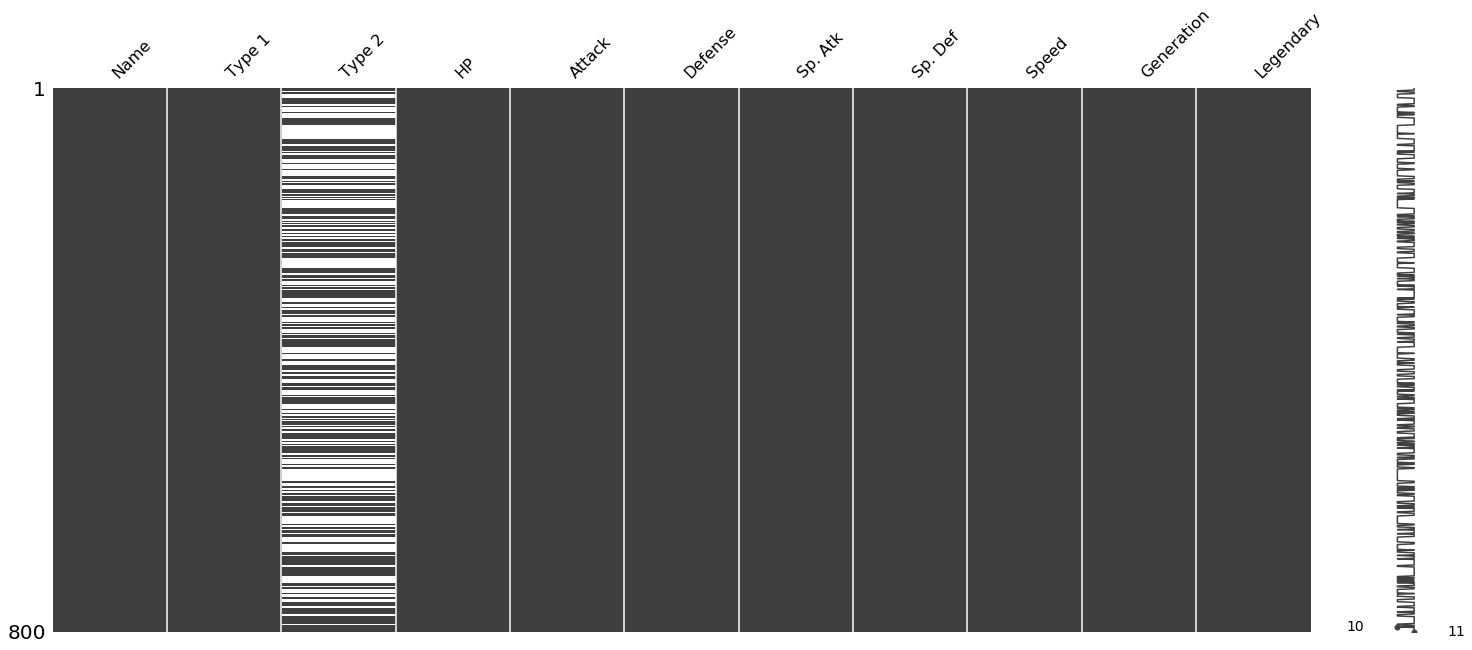

In [3]:
import missingno as msno

msno.matrix(df)

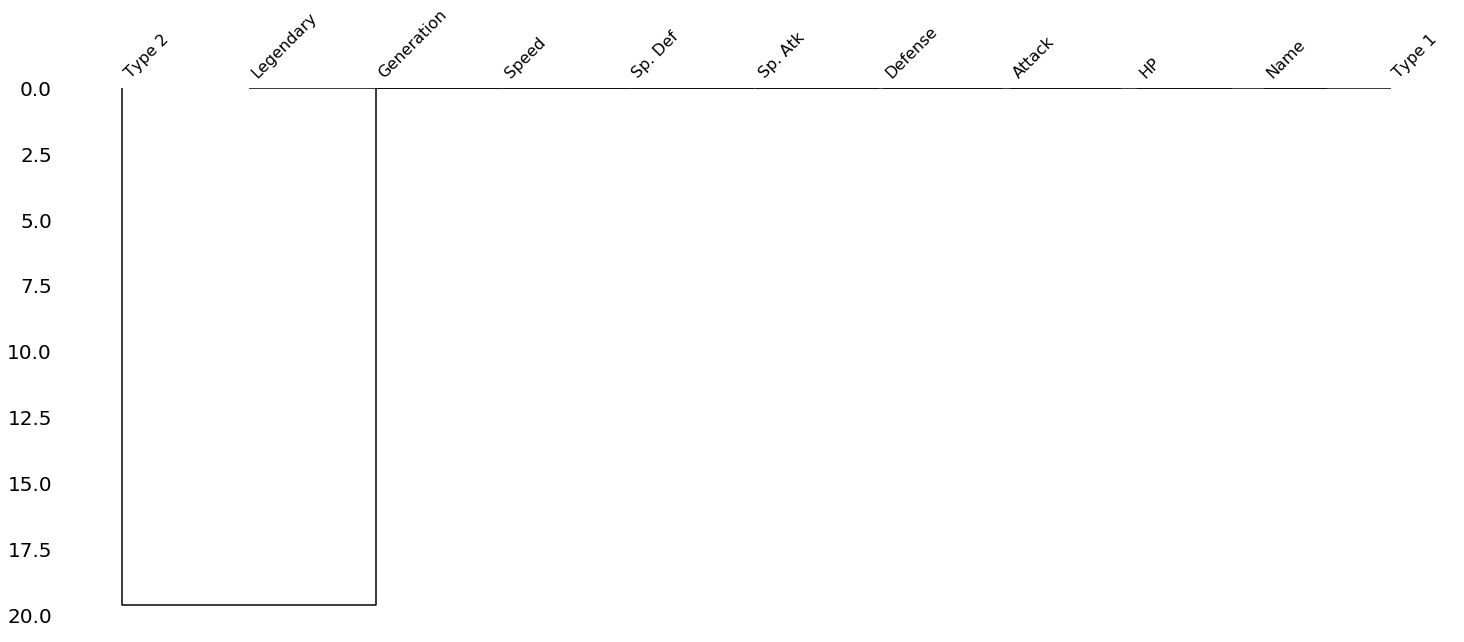

In [6]:
msno.dendrogram(df)

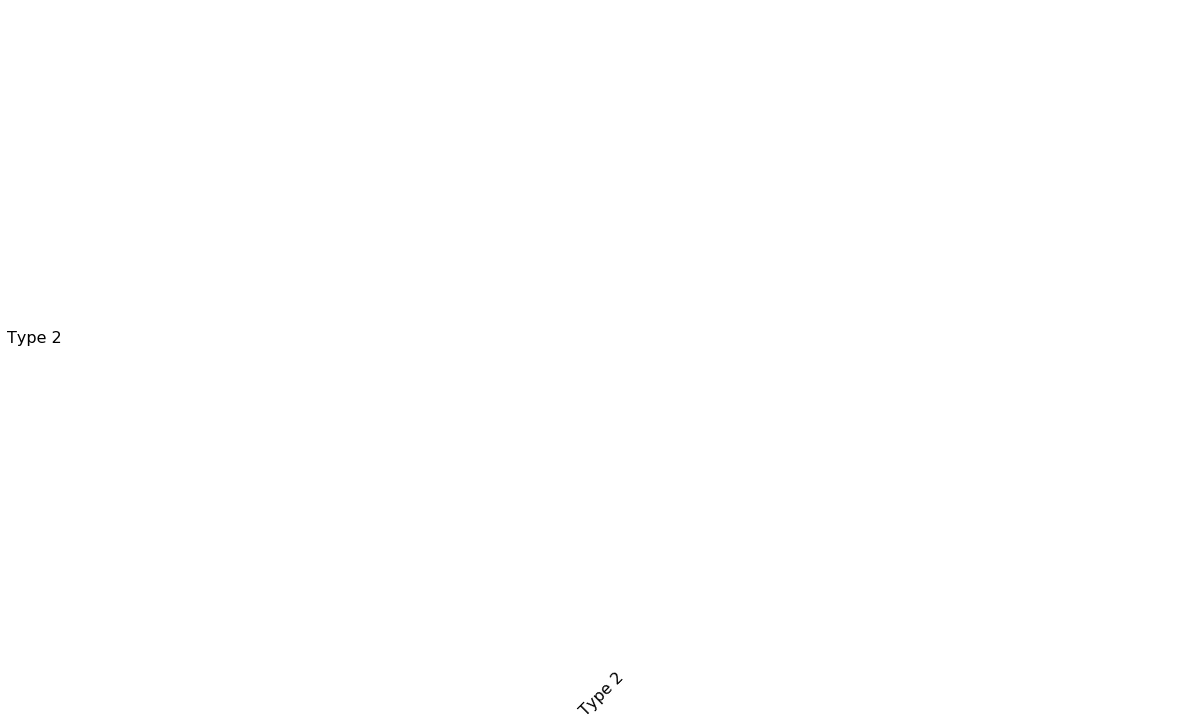

In [7]:
msno.heatmap(df)

# Efficiency

In [4]:
import time

def measure_fct_performance(fct):
    
    start = time.time()
    
    fct
    
    end = time.time()
    
    print(end - start)

* Favor list comprehension over explicit loops
* Favor .iloc over .loc to select rows in a pandas df
* Favor [] over .iloc to select columns
* Favor pandas fct over np when working on df (ex: .sample)
* use dicts in .replace()
* use apply() when possible
* use vectorization via .sum()
* use ndarrays instead of pd series via .values

## Vectorization

In [122]:
start = time.time()
df[["Attack", "Defense"]].sum(axis=1).head()

print(time.time()- start)

0.0017282962799072266


In [121]:
start = time.time()
df[["Attack", "Defense"]].values.sum(axis=1)[:5]

print(time.time()-  start)

0.0012409687042236328


# Writing

In [32]:
df.to_parquet("results/pokemon.parquet")

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
pyarrow or fastparquet is required for parquet support